In [2]:

# Regression - predict future values and the model is trained with historical data
# import necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as matp  


In [3]:
# with pandas library read dataset and show it

dataset = pd.read_csv('Summary of Weather.csv')
dataset

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


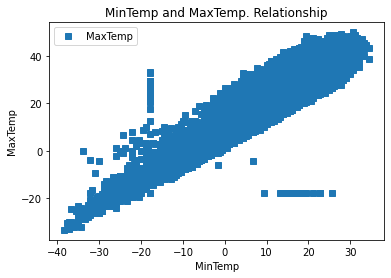

In [4]:
# show graphic of MinTemp and MaxTemp and how they will be changed
# used matplotlib library
dataset.plot(x='MinTemp', y='MaxTemp', style='s')  

matp.title('MinTemp and MaxTemp. Relationship')  
matp.xlabel('MinTemp')  
matp.ylabel('MaxTemp')  
matp.show()

In [5]:
# load x = mintemp (independent, so we will use historical data about this), y = maxtemp values (dependent, in order to predict it) 
Y = dataset.iloc[:, 4].values
X = dataset.iloc[:, 5].values 

In [6]:
# we need to 2D array so reshaped them
x = X.reshape(-1, 1)
y = Y.reshape(-1, 1)


In [7]:
# we have to split our variables into a training and test set for regression model
# X train set = The independent values 
# Y train set = The dependent values 
# X test set = The independent values used to predict the dependent values
# Y test set = The values used to compare to the values we predicted to see if our model worked
# A training set is a portion of a data set used to fit (train) a model for 
# prediction or classification of values that are known in the training set, but unknown in other (future) data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# A test set in machine learning is a secondary (or tertiary) data set 
# that is used to test a machine learning program after it has been trained on an initial training data set.
# If you do not use a random_state in train_test_split, every time you make the split you might get a different 
# set of train and test data points and will not help you in debugging in case you get an issue.

In [8]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)
regr.score(x, y)


0.7715529627377611

In [9]:
y_pred = regr.predict(x_test)



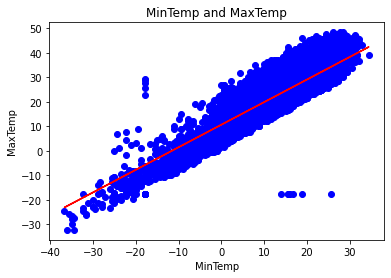

In [10]:
matp.scatter(x_test, y_test, color='blue')
matp.plot(x_test, regr.predict(x_test), color='red')
matp.title('MinTemp and MaxTemp')
matp.xlabel('MinTemp')
matp.ylabel('MaxTemp')
matp.show()

In [11]:
regr.predict(np.array([15]).reshape(1, 1))


array([[24.46138671]])